# IS6227 Data Mining Assignment 2
### Kan May Yoke Michelle, G2203916B

In [1]:
# Install mlxtend package
!pip3 install mlxtend

In [2]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from csv import reader
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore')


### Loading Original Dataset

In [3]:
# Load dataset
groceries = []
with open('groceries.csv', 'r') as inputf:
    csv_reader = reader(inputf)
    for line in csv_reader:
        groceries.append(line)

print(groceries)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

In [4]:
col_count = [ len(items) for items in groceries]
max_items = max(col_count)
col_names = ["item_" + str(i) for i in range(0, max(col_count))]
df = pd.read_csv("groceries.csv", header=None, delimiter=",", names=col_names)
df

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Creating new Grocery dataset

In [7]:
from random import randint
new_groceries = list()

with open("new_groceries1.csv", "w") as outputf:
    for i in range(9000):
        rand_itemset = groceries[randint(0,9834)]
        new_groceries.append(rand_itemset)
        outputf.write(",".join(rand_itemset) + "\n")

print(new_groceries)

[['chicken', 'sugar', 'photo/film'], ['oil'], ['whole milk', 'instant coffee', 'misc. beverages', 'fruit/vegetable juice', 'chewing gum', 'shopping bags'], ['detergent'], ['sausage', 'ham', 'yogurt', 'sugar', 'misc. beverages', 'abrasive cleaner', 'cleaner', 'dishes'], ['citrus fruit', 'herbs', 'other vegetables', 'curd'], ['bottled beer'], ['ham', 'pork', 'hard cheese', 'domestic eggs', 'rolls/buns', 'pastry', 'sugar', 'salty snack'], ['other vegetables', 'rolls/buns', 'meat spreads', 'bottled water', 'soda', 'misc. beverages', 'waffles', 'chocolate', 'candy'], ['grapes', 'root vegetables', 'whole milk', 'butter', 'whipped/sour cream', 'condensed milk', 'roll products', 'oil', 'bottled water', 'fruit/vegetable juice'], ['bottled beer', 'seasonal products'], ['pork'], ['whole milk', 'hard cheese', 'brown bread', 'coffee', 'soda'], ['curd', 'cat food', 'soda'], ['citrus fruit'], ['whipped/sour cream'], ['newspapers'], ['ham', 'whole milk', 'rolls/buns'], ['root vegetables', 'other veget

In [8]:
# Support for each item
all_items = []
for items in new_groceries:
    all_items.extend(items)
item_dict = dict(Counter(all_items))
total_items = len(item_dict) 

support_dict = {item: count / total_items for item, count in item_dict.items()}
support_dict_sorted = dict(sorted(support_dict.items(), key=lambda x: x[1], reverse = True))
support_df = pd.DataFrame({'Item': list(support_dict_sorted.keys()), 'Support': list(support_dict_sorted.values())})
support_df

,Item,Support
0,whole milk,13.792899
1,other vegetables,10.372781
2,rolls/buns,9.562130
3,soda,9.562130
4,yogurt,7.165680
...,...,...
164,kitchen utensil,0.011834
165,baby food,0.011834
166,bags,0.005917
167,preservation products,0.005917


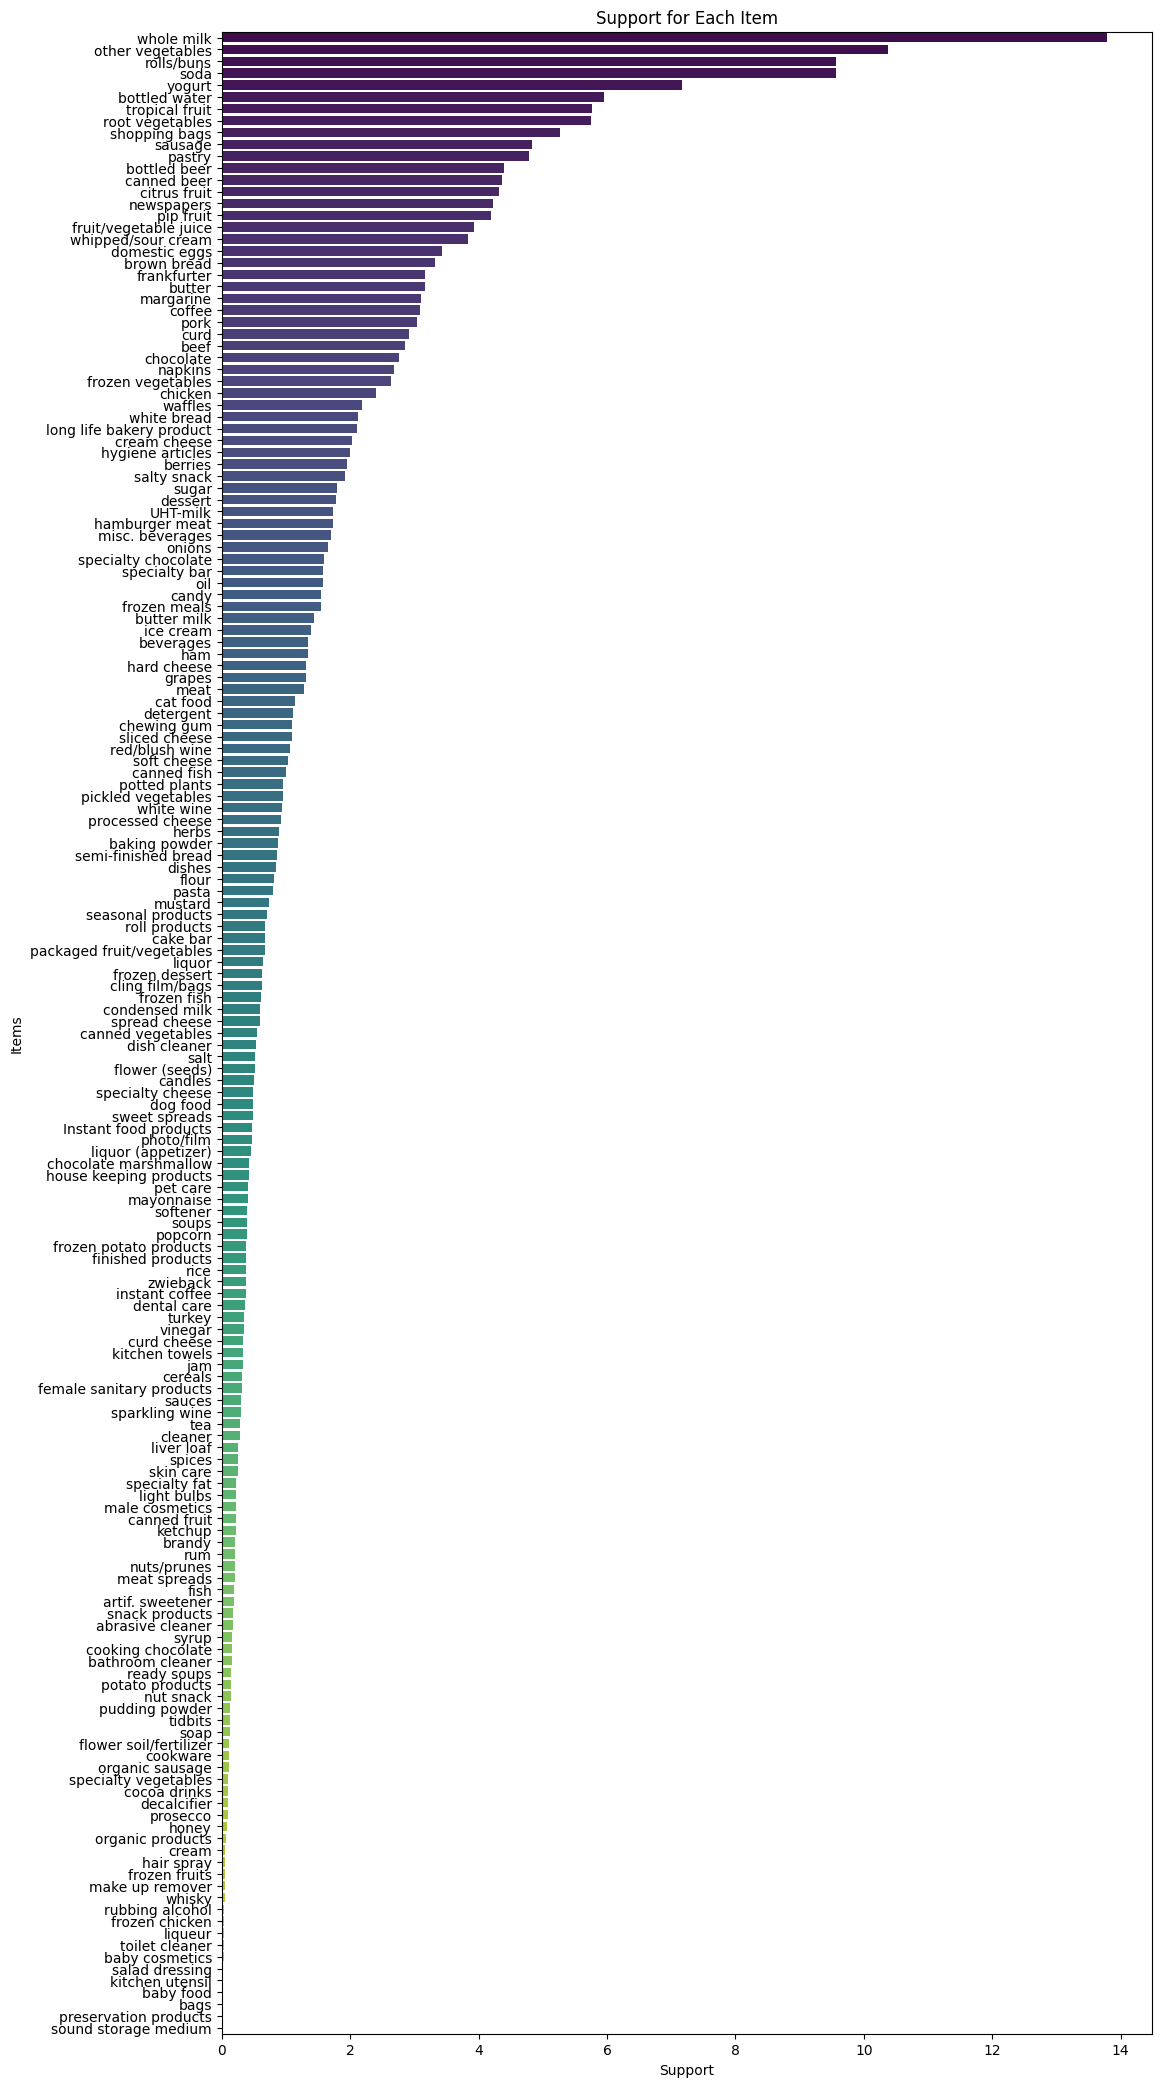

In [9]:
plt.figure(figsize=(12, 26))
sns.barplot(x='Support', y='Item', data=support_df, palette='viridis')
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Support for Each Item')
plt.show()

In [10]:
# Load dataset
new_groceries = []
with open('new_groceries1.csv', 'r') as inputf:
    csv_reader = reader(inputf)
    for line in csv_reader:
        new_groceries.append(line)

print(new_groceries)

[['chicken', 'sugar', 'photo/film'], ['oil'], ['whole milk', 'instant coffee', 'misc. beverages', 'fruit/vegetable juice', 'chewing gum', 'shopping bags'], ['detergent'], ['sausage', 'ham', 'yogurt', 'sugar', 'misc. beverages', 'abrasive cleaner', 'cleaner', 'dishes'], ['citrus fruit', 'herbs', 'other vegetables', 'curd'], ['bottled beer'], ['ham', 'pork', 'hard cheese', 'domestic eggs', 'rolls/buns', 'pastry', 'sugar', 'salty snack'], ['other vegetables', 'rolls/buns', 'meat spreads', 'bottled water', 'soda', 'misc. beverages', 'waffles', 'chocolate', 'candy'], ['grapes', 'root vegetables', 'whole milk', 'butter', 'whipped/sour cream', 'condensed milk', 'roll products', 'oil', 'bottled water', 'fruit/vegetable juice'], ['bottled beer', 'seasonal products'], ['pork'], ['whole milk', 'hard cheese', 'brown bread', 'coffee', 'soda'], ['curd', 'cat food', 'soda'], ['citrus fruit'], ['whipped/sour cream'], ['newspapers'], ['ham', 'whole milk', 'rolls/buns'], ['root vegetables', 'other veget

In [11]:
col_count = [ len(items) for items in new_groceries]
max_items = max(col_count)
col_names = ["item_" + str(i) for i in range(0, max(col_count))]
df_new_groceries = pd.read_csv("new_groceries.csv", header=None, delimiter=",", names=col_names)
df_new_groceries

,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_22,item_23,item_24,item_25,item_26,item_27,item_28,item_29,item_30,item_31
0,frozen fish,nuts/prunes,cocoa drinks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hair spray,toilet cleaner,mayonnaise,bottled water,berries,chocolate marshmallow,brandy,long life bakery product,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,cocoa drinks,citrus fruit,frozen fruits,sugar,brandy,frozen vegetables,UHT-milk,rolls/buns,condensed milk,pip fruit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,salt,hard cheese,detergent,preservation products,specialty bar,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,baking powder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,dental care,butter milk,light bulbs,grapes,pasta,rum,house keeping products,coffee,cream,mayonnaise,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9796,canned beer,organic sausage,specialty cheese,specialty chocolate,spread cheese,ham,flour,frankfurter,finished products,artif. sweetener,...,pip fruit,photo/film,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9797,hard cheese,sweet spreads,skin care,chocolate,prosecco,ready soups,tropical fruit,softener,rice,toilet cleaner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9798,decalcifier,mayonnaise,specialty bar,canned fruit,soft cheese,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Processing Apriori algorithm

In [12]:
# Prepare the dataframe to apply Apriori algorithm
from mlxtend.preprocessing import TransactionEncoder

encoder=TransactionEncoder()
transactions=encoder.fit(new_groceries).transform(new_groceries).astype('int')
df_grocery=pd.DataFrame(transactions, columns=encoder.columns_)

print(df_grocery.shape)
df_grocery

(9000, 169)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
# applying the apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
import time

sample_size=[150, 250, 500, 1000, 2000, 3000, 4500,6000]
processing=dict()

for size in sample_size:
    grocery_data=df_grocery.sample(size)
    for i in range(30):    
        start_time = time.time()
        # Building the model 
        frq_items = apriori(grocery_data.astype('bool'),min_support=0.03,use_colnames = True)
        #print(frq_items)
        rules=association_rules(frq_items, metric ="confidence", min_threshold = 0.6) 
        rules=rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
        end_time = time.time()
        duration = end_time - start_time
        
        if not size in processing:
            processing[size]= [duration]
        else:
            processing[size].append(duration)

# Time taken to complete 50 times apriori algorithm for different datasets
df_processing=pd.DataFrame(processing)
df_processing

,150,250,500,1000,2000,3000,4500,6000
0,0.012993,0.007358,0.011758,0.011382,0.010989,0.019802,0.034226,0.046805
1,0.013541,0.015530,0.011119,0.013976,0.026539,0.028763,0.034486,0.042346
2,0.013324,0.008304,0.011672,0.014581,0.023563,0.023954,0.030036,0.043777
3,0.005664,0.008976,0.010925,0.014638,0.019242,0.023315,0.025430,0.034401
4,0.018119,0.007925,0.011998,0.014641,0.024435,0.029418,0.041634,0.041744
5,0.012586,0.012253,0.012001,0.014120,0.024438,0.026464,0.033778,0.046152
6,0.012524,0.010317,0.008357,0.016529,0.020960,0.027966,0.034849,0.038677
7,0.013373,0.008457,0.014823,0.014534,0.020290,0.024684,0.033705,0.032720
8,0.010163,0.009982,0.011324,0.008073,0.015707,0.025021,0.031015,0.039979
9,0.009041,0.008902,0.012008,0.020166,0.018208,0.026212,0.036611,0.044070


In [87]:
# Mean and standard diviation for the time taken
print("Means duration of Apriori:")
means = df_processing.mean()
print(means)
print()
stds = df_processing.std()
print("Standard deviations of Apriori:")
print(stds)

Means duration of Apriori:
150     0.011191
250     0.010825
500     0.011970
1000    0.014442
2000    0.019454
3000    0.026469
4500    0.034200
6000    0.041439
dtype: float64

Standard deviations of Apriori:
150     0.003825
250     0.003175
500     0.003381
1000    0.002705
2000    0.003980
3000    0.004122
4500    0.003223
6000    0.004520
dtype: float64


Text(0, 0.5, 'Time (sec)')

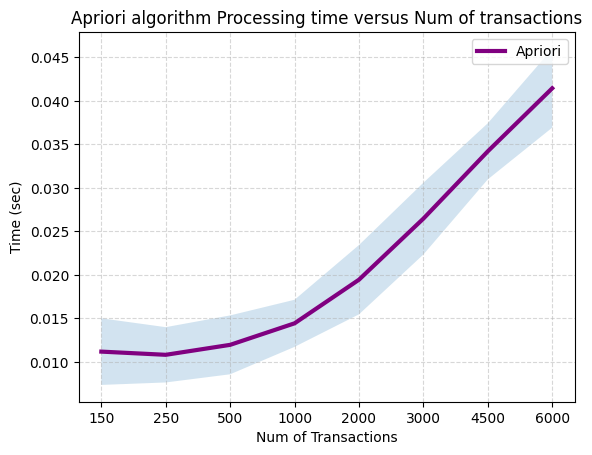

In [88]:
# Plot graph on time taken to run Apriori Algorithm
import matplotlib.pylab as plt
import plotly.graph_objects as go
import plotly.express as px

means_list=df_processing.mean().tolist()
x = range(0,8)
labels = sample_size
plt.xticks(x,labels)
plt.grid(linestyle='--', alpha=0.5)
plt.plot(means_list,label = 'Apriori', linewidth=3, color="purple")
plt.legend()
plt.fill_between(range(8),np.array(means)-np.array(stds),np.array(means)+np.array(stds),alpha=.2)
plt.title('Apriori algorithm Processing time versus Num of transactions')
plt.xlabel('Num of Transactions')
plt.ylabel('Time (sec)')

## Estimating Brute Force Duration

In [89]:
## Formula: C = t / (N x 2**d)
means = df_processing.mean().tolist()
means_dict = dict(df_processing.mean())

d = df_grocery.shape[1]

C= means_dict[150]/(150 * 2 ** d)
print(f"C = {C}")

brute_force_dur = list()
for N in sample_size:   # sample size is [150, 250, 500, 1000, 2000, 3000, 4500, 6000]
    time= C * ( N * 2 ** d)
    brute_force_dur.append(time)
    print(f"Time taken for {N} trasactions: {time}")

C = 9.970702045225915e-56
Time taken for 150 trasactions: 0.011191447575887045
Time taken for 250 trasactions: 0.01865241262647841
Time taken for 500 trasactions: 0.03730482525295682
Time taken for 1000 trasactions: 0.07460965050591364
Time taken for 2000 trasactions: 0.1492193010118273
Time taken for 3000 trasactions: 0.2238289515177409
Time taken for 4500 trasactions: 0.3357434272766114
Time taken for 6000 trasactions: 0.4476579030354818


In [90]:
## Formula: C = 𝐶(𝑁 * 2**d *𝑤 * 3**d − 2**(d+1) + 1)

means = df_processing.mean().tolist()
means_dict = dict(df_processing.mean())

d= df_grocery.shape[1]
time = []
C= means_dict[150] / (150 * 2**d + 3**d - 2**(d+1) + 1)
print(f"C = {C}")

for N in sample_size:   # sample size is [150, 250, 500, 1000, 2000, 3000, 4500, 6000]
    time= C * ( N * 2 ** d+3 ** d-2 ** (d+1))
    print(f"Time taken for {N} trasactions: {time}")


C = 2.6025208471841e-83
Time taken for 150 trasactions: 0.011191447575887045
Time taken for 250 trasactions: 0.011191447575887045
Time taken for 500 trasactions: 0.011191447575887045
Time taken for 1000 trasactions: 0.011191447575887045
Time taken for 2000 trasactions: 0.011191447575887045
Time taken for 3000 trasactions: 0.011191447575887045
Time taken for 4500 trasactions: 0.011191447575887045
Time taken for 6000 trasactions: 0.011191447575887045


In [91]:
d = df_grocery.shape[1]
T1 = 3**d - 2**(d+1)
print(T1)

T2=150 * 2**d
print(T2)

430023359390034222082732011946860220634520402626757122001337339969404822623413859
112243325747013344118042995152610535909575619300556800


Text(0, 0.5, 'Time (sec)')

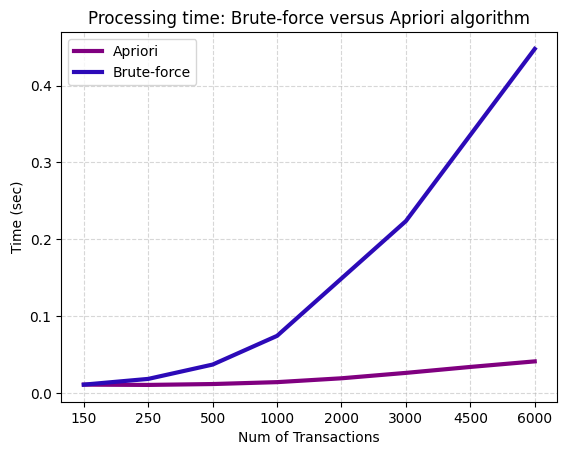

In [92]:
means = df_processing.mean().tolist()
brute= brute_force_dur
x = range(0,8)

# Apriori
labels = sample_size
plt.xticks(x,labels)
plt.plot (means,label='Apriori',linewidth=3, color="purple")
plt.legend()
plt.grid(linestyle='--', alpha=0.5)

# Brute-force
plt.plot(brute,label='Brute-force',linewidth=3, color="#2C0AB8")
plt.legend()
plt.title('Processing time: Brute-force versus Apriori algorithm')
plt.xlabel('Num of Transactions')
plt.ylabel('Time (sec)')